# Predict house price in King County, USA



### Goal

For this project, we work with work with King County house price DataSet obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction. Using a Deep Learning neural network, our goal here will be to predict The price of the house. 

### The Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.It's a great dataset for evaluating simple regression models.


#### Here are the Variable in the Dataset:

    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The data

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Exploratory Data Analysis

Exploratory data analysis! Since we will be attempting to predict the price of the house, lets create some plot in order to get a better comprehension of the dataset.

### Plotting to see a distribution of the house price 

In [6]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


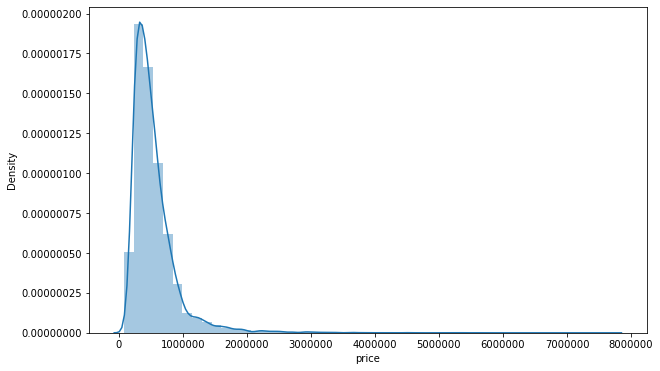

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.ticklabel_format(style='plain', axis='both')

as we can see there house price a pretty mutch in the range of 0 tp 3million $ and we have ome outsiders from 3M to 8M

### Checking how many bedroom an house usually have

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

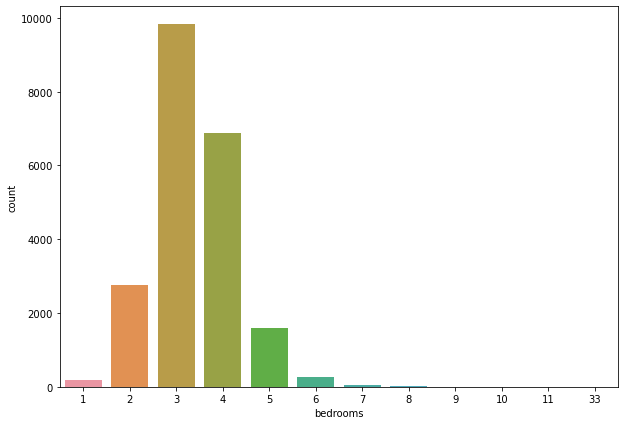

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(df['bedrooms'])

### Checking how many bathroom an house usually have

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

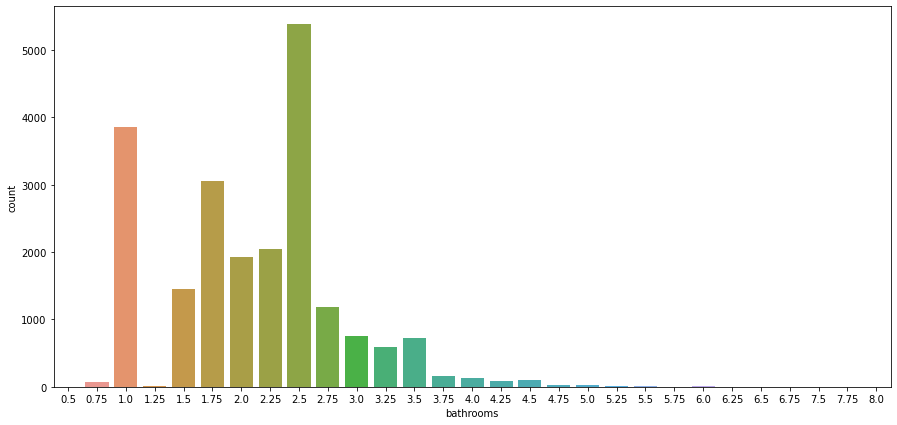

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(df['bathrooms'])

### Checking how many floor an house usually have

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='count'>

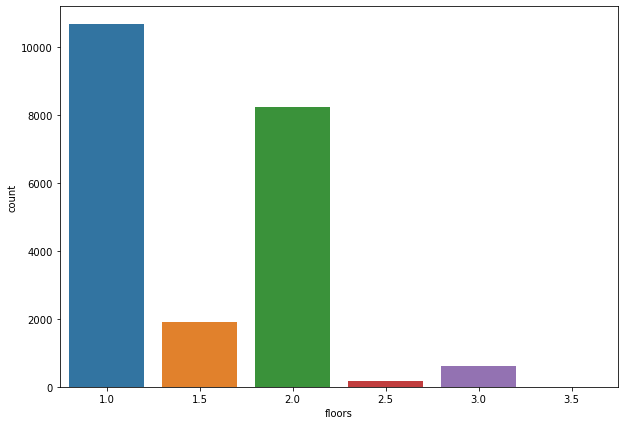

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(df['floors'])

### Checking correlation between sqft living of an house VS the price

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

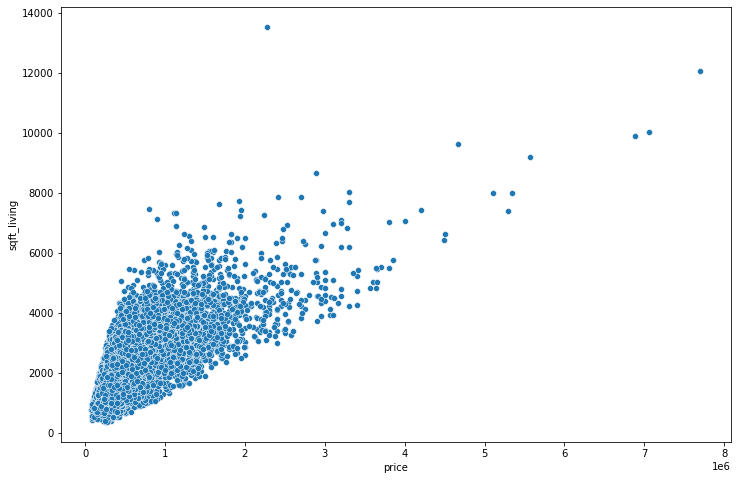

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Checking correlation between the grade of an house VS the price

<AxesSubplot:xlabel='price', ylabel='grade'>

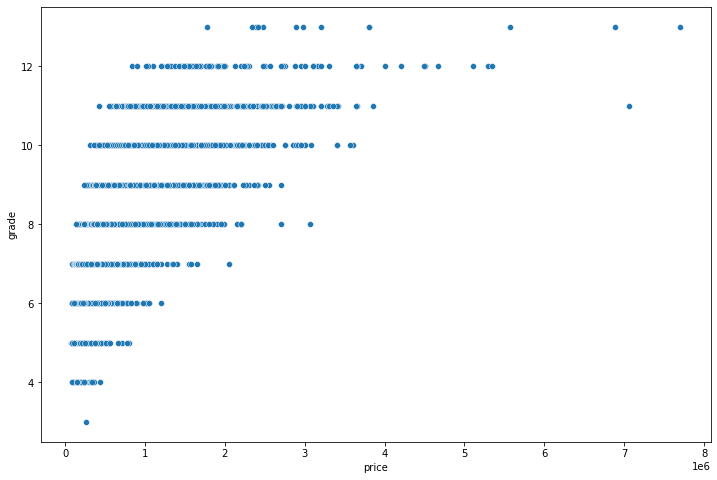

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='grade',data=df)

### Checking correlation between the number of bedroom an house have VS the price

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

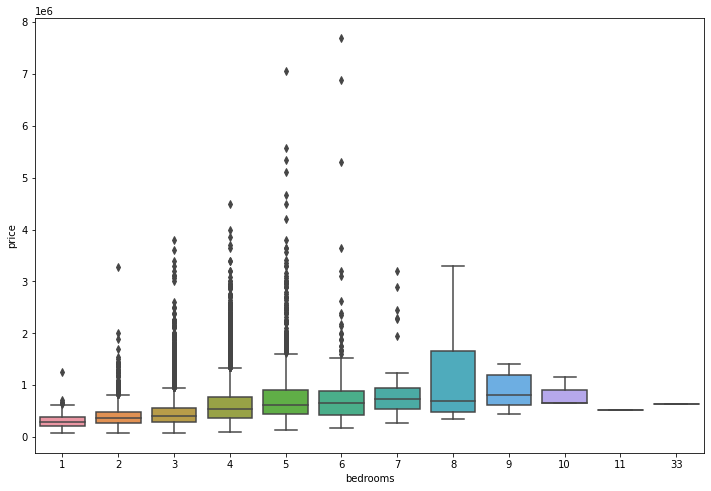

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

### Checking correlation between the number of bathroom an house have VS the price

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

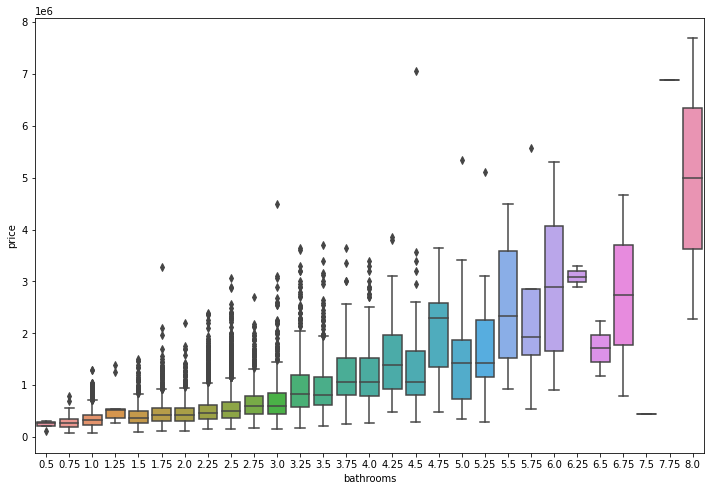

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=df)

### Checking correlation between an house that have a watrerfront or not VS the price

<AxesSubplot:xlabel='waterfront', ylabel='price'>

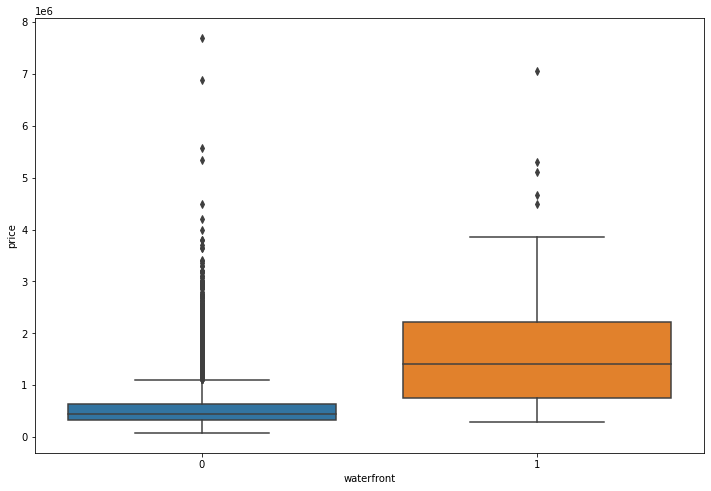

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='waterfront',y='price',data=df)


### Checking correlation between the number of floor an house have VS the price

<AxesSubplot:xlabel='floors', ylabel='price'>

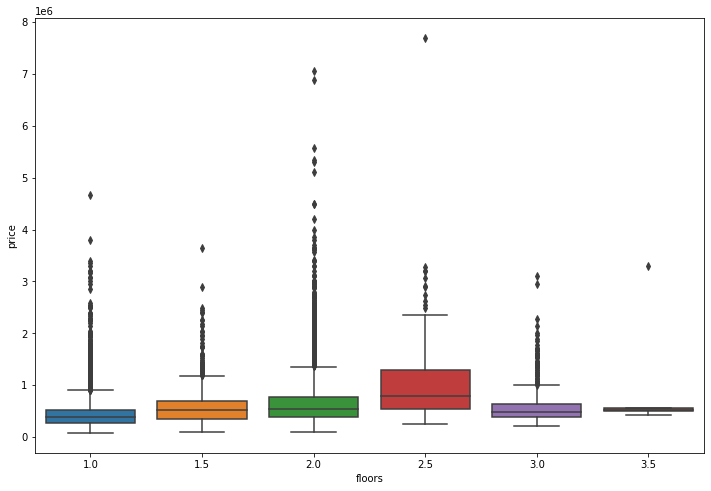

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y='price',data=df)


### With all these plot done, we get a pretty intuitive comprehension of why a house is more expensive than others

## Geographical Properties
lets explore with the variable Lattitude and Longitude if we can get a better understanding where are the most expensivre area in King County.

<AxesSubplot:xlabel='price', ylabel='long'>

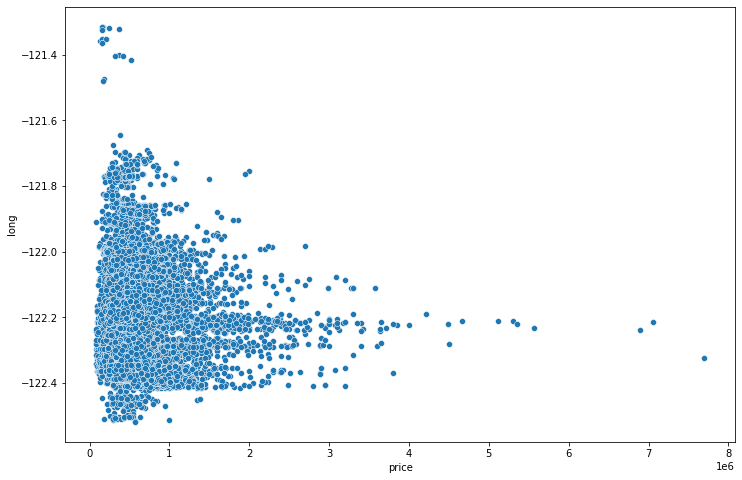

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

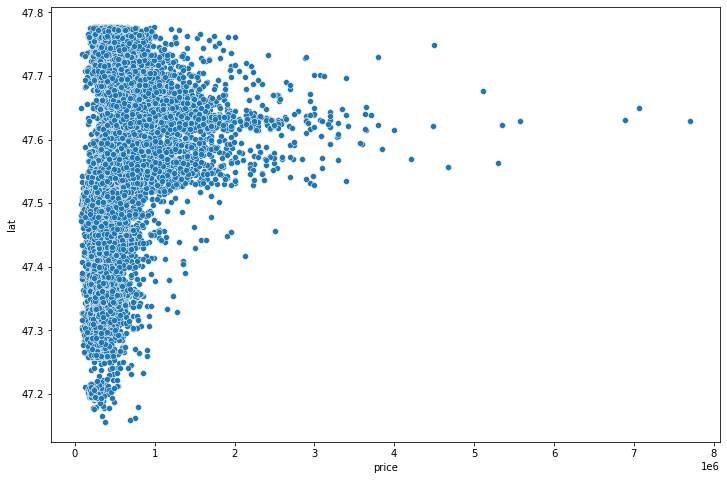

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

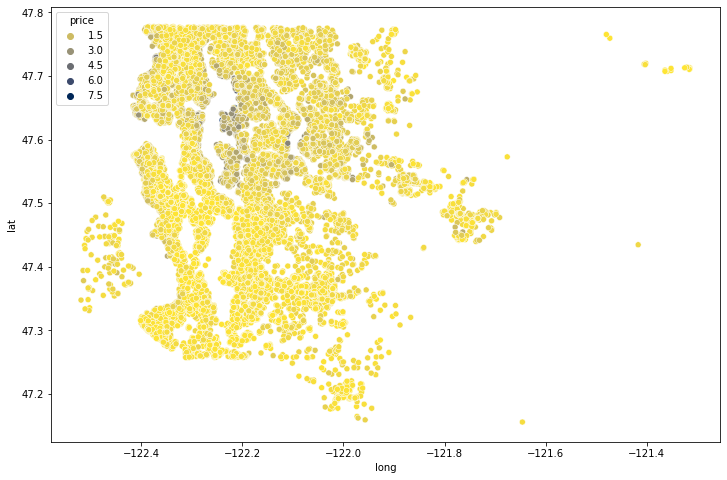

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price', palette='cividis_r')

since we have some ousider that dosent realy help us vusialising where are the most expensive house, lets remove them by deleting 427 most expensive house and then replot with better color

In [20]:
df.count().price*0.02

431.94

since we have some ousider that dosent realy help us vusialising where are the most expensive house, lets remove them by deleting 427 most expensive house and then replot with better color

In [21]:
df_remove2percent = df.sort_values('price',ascending=False).iloc[427:]

In [22]:
df = df_remove2percent

<AxesSubplot:xlabel='long', ylabel='lat'>

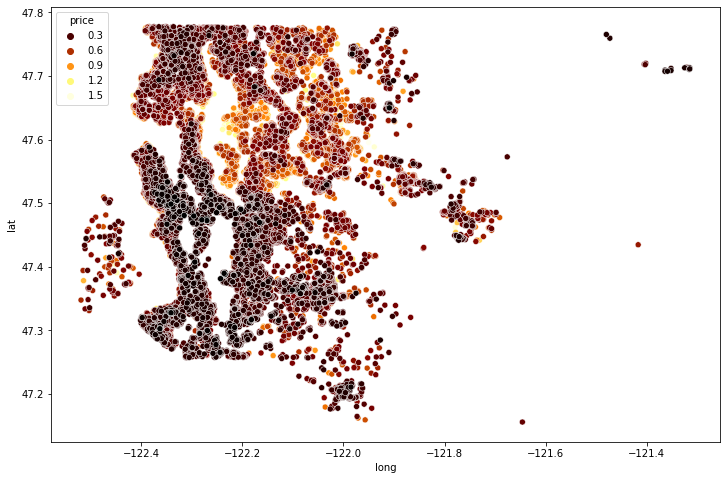

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df_remove2percent,hue='price',
                palette='afmhot',alpha=1)

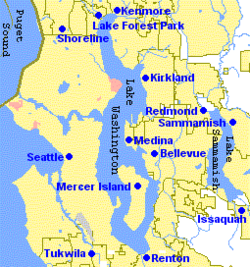

In [24]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Seattle-lakewashington-lakesammamish.PNG/250px-Seattle-lakewashington-lakesammamish.PNG'
Image(url,width=600, height=300)

## Variable Correlation
Lets see what varriable are the most correlated with the price of an house

In [25]:
df.corr().price.sort_values()

zipcode         -0.031391
id              -0.003628
condition        0.036761
long             0.047229
yr_built         0.059127
sqft_lot15       0.087866
sqft_lot         0.091494
waterfront       0.097077
yr_renovated     0.107087
sqft_basement    0.277199
floors           0.277391
bedrooms         0.311620
view             0.314802
lat              0.386782
bathrooms        0.494216
sqft_above       0.565171
sqft_living15    0.593035
sqft_living      0.662891
grade            0.670562
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

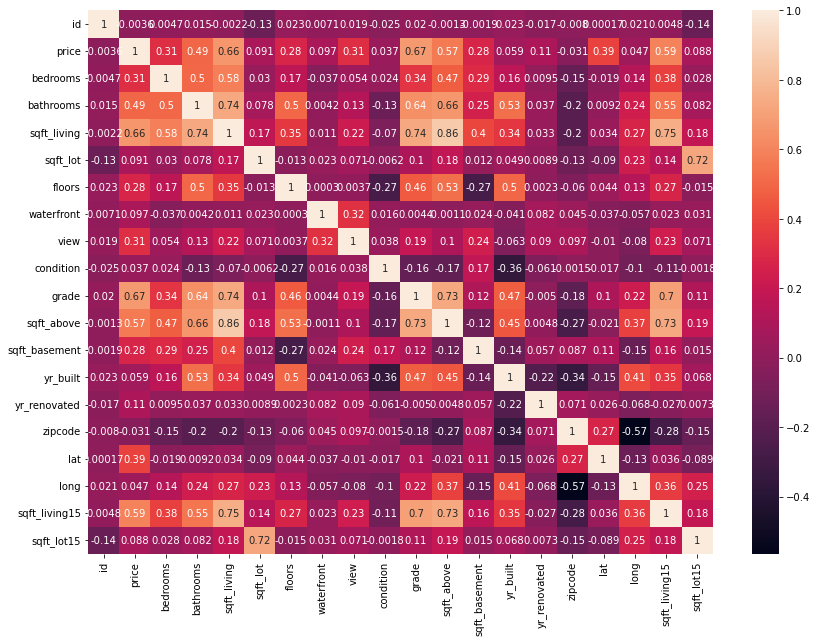

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

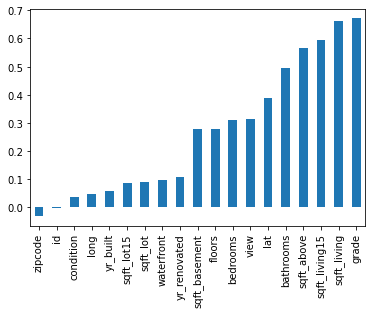

In [27]:
df.corr().price.sort_values().drop('price').plot(kind='bar')

Now that we have explore all the data, we can get a pretty clear understanding of what variable is affecting the price on an house. Let continue with some Data engineering in orther to prepar the data for our Deep learning model.

# Feature Data engineering

### Missing Data

In [28]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Data Type

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21170 entries, 1985 to 15279
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21170 non-null  int64  
 1   date           21170 non-null  object 
 2   price          21170 non-null  float64
 3   bedrooms       21170 non-null  int64  
 4   bathrooms      21170 non-null  float64
 5   sqft_living    21170 non-null  int64  
 6   sqft_lot       21170 non-null  int64  
 7   floors         21170 non-null  float64
 8   waterfront     21170 non-null  int64  
 9   view           21170 non-null  int64  
 10  condition      21170 non-null  int64  
 11  grade          21170 non-null  int64  
 12  sqft_above     21170 non-null  int64  
 13  sqft_basement  21170 non-null  int64  
 14  yr_built       21170 non-null  int64  
 15  yr_renovated   21170 non-null  int64  
 16  zipcode        21170 non-null  int64  
 17  lat            21170 non-null  float64
 18  lon

In [30]:
df.select_dtypes(['object']).columns

Index(['date'], dtype='object')

The only object variable we have is the date string so let convert it

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)


let see if the house price is changing with the month of the year

<AxesSubplot:xlabel='month'>

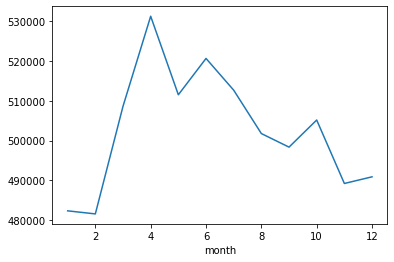

In [32]:
df.groupby('month').mean()['price'].plot()

As we can see the is an prime time during the summer

## Engineering other variable

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21170 entries, 1985 to 15279
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21170 non-null  int64  
 1   price          21170 non-null  float64
 2   bedrooms       21170 non-null  int64  
 3   bathrooms      21170 non-null  float64
 4   sqft_living    21170 non-null  int64  
 5   sqft_lot       21170 non-null  int64  
 6   floors         21170 non-null  float64
 7   waterfront     21170 non-null  int64  
 8   view           21170 non-null  int64  
 9   condition      21170 non-null  int64  
 10  grade          21170 non-null  int64  
 11  sqft_above     21170 non-null  int64  
 12  sqft_basement  21170 non-null  int64  
 13  yr_built       21170 non-null  int64  
 14  yr_renovated   21170 non-null  int64  
 15  zipcode        21170 non-null  int64  
 16  lat            21170 non-null  float64
 17  long           21170 non-null  float64
 18  sqf

Since we dont need the 'id' lets drop it

In [34]:
df = df.drop('id',axis=1)


In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
1985,1600000.0,3,4.25,2820,7200,2.0,0,0,4,10,...,360,1930,0,98112,47.6298,-122.290,3300,7522,6,2014
3582,1600000.0,4,4.50,3780,6000,2.0,0,4,4,11,...,1010,1910,1977,98116,47.5922,-122.388,2660,6000,2,2015
20808,1600000.0,5,3.75,3570,10125,2.0,0,0,3,10,...,0,2014,0,98040,47.5639,-122.223,1760,10125,9,2014
4185,1600000.0,4,2.75,3680,5000,2.0,0,3,3,9,...,1200,1936,0,98105,47.6599,-122.269,3200,5000,10,2014
7426,1600000.0,5,3.50,4050,20925,2.0,0,3,3,10,...,1030,1973,2005,98040,47.5348,-122.241,3880,18321,3,2015


## Encoding variable to feed the model

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder_Num_Variable = LabelEncoder()


In [37]:
df['zipcode'].nunique()

70

In [38]:
df['zipcode'] = encoder_Num_Variable.fit_transform(df['zipcode'])

In [39]:
df['zipcode'].value_counts()

42    601
23    589
49    579
28    572
51    553
     ... 
8     100
41     98
14     77
61     57
24     17
Name: zipcode, Length: 70, dtype: int64

In [40]:
df['yr_built'] = encoder_Num_Variable.fit_transform(df['yr_built'])

In [41]:
df['yr_renovated'] = encoder_Num_Variable.fit_transform(df['yr_renovated'])

## Scaling and Train Test Split

In [42]:
X = df.drop('price',axis=1)
y = df['price']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

### Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
X_train= scaler.fit_transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

## Creating a Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [50]:
X_train.shape

(14819, 20)

In [51]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=1000,verbose=0)

## Checking if we overfit

In [54]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

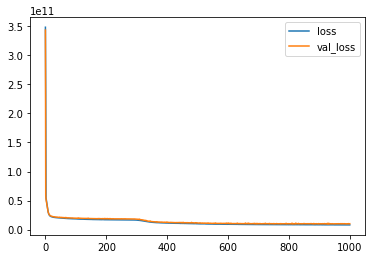

In [55]:
plt.figure(figsize=(10,7))
losses.plot()

## Evaluation on Test Data

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [57]:
predictions = model.predict(X_test)

In [58]:
mean_absolute_error(y_test,predictions)

64514.47288352051

In [59]:
explained_variance_score(y_test,predictions)

0.8747047666663489

## Checking if we are good considering we are off price of 65K 

In [60]:
df['price'].mean()

517427.11180792813

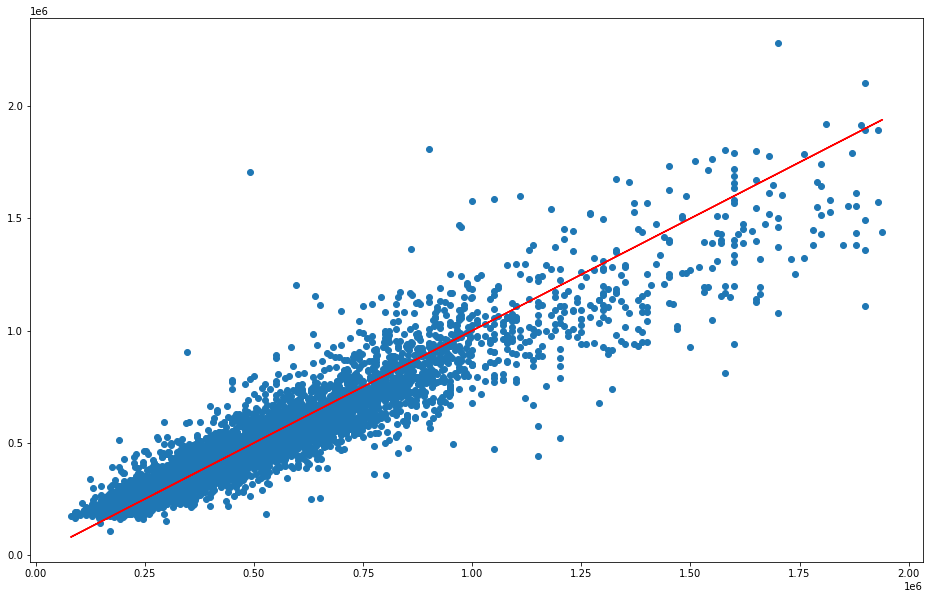

In [68]:
# Our predictions
plt.figure(figsize=(16,10))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')


# Conclusion 

Considering that the mean price of a house is 517k $ and that we are only off 65k  prediction, I think our result is pretty satisfying. I could pass more time tunning the model to get better result, but for this project, I'm pretty happy with the result.